In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def kl_div_multivariate_normal(mu_1, sigma_1, mu_2, sigma_2):
    N = len(mu_1)
    
    A = 2 * N * (np.log(sigma_2) - np.log(sigma_1)) - N
    B = N * np.exp(2 * np.log(sigma_1) - 2 * np.log(sigma_2))
    C = np.linalg.norm(mu_1) ** 2 / sigma_2 ** 2
    
    return 0.5 * (A + B + C)

In [6]:
# Prior = 2
N = 10
mu_2 = np.zeros(N)
sigma_2 = 1

# Posterior = 1
mu_1 = np.random.randn(N)
sigma_1 = np.logspace(-3, 2, 100)

In [7]:
kl = kl_div_multivariate_normal(mu_1, sigma_1, mu_2, sigma_2)

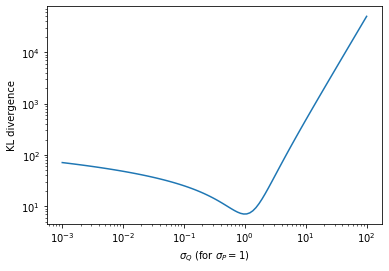

In [32]:
plt.loglog(sigma_1, kl)
plt.xlabel(r"$\sigma_Q$ (for $\sigma_P=1$)")
plt.ylabel("KL divergence")
plt.savefig("kl-general.png", dpi=400)

In [33]:
def gap(N, sigma, t):
    return N / 2 * (np.log(sigma ** 2) + 1 / (t * sigma ** 2) - 1 / t)

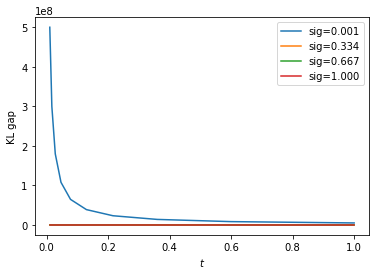

In [53]:
sigmas = np.linspace(0.001, 1, 4)
N = 10
t = np.logspace(-2, 0, 10)
for sigma in sigmas:
    plt.plot(t, gap(N, sigma, t)), label=f"sig={sigma:.3f}")
plt.xlabel(r"$t$")
plt.ylabel("KL gap")
plt.legend()
plt.show()

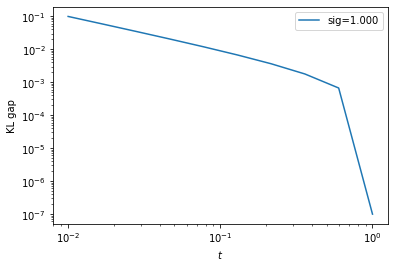

In [59]:
sigma = 0.9999
N = 10
t = np.logspace(-2, 0, 10)
plt.loglog(t, gap(N, sigma, t), label=f"sig={sigma:.3f}")
plt.xlabel(r"$t$")
plt.ylabel("KL gap")
plt.legend()
plt.show()

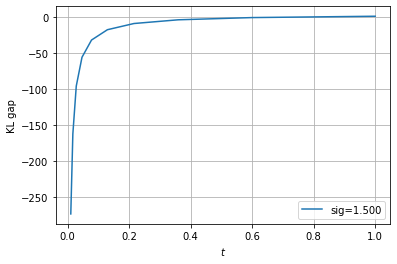

In [76]:
sigma = 1.5
N = 10
t = np.logspace(-2, 0, 10)
plt.plot(t, gap(N, sigma, t), label=f"sig={sigma:.3f}")
plt.xlabel(r"$t$")
plt.ylabel("KL gap")
plt.legend()
plt.grid()
plt.show()

In [75]:
sigma = 1.5
num = 1 - 1 / sigma ** 2
denum = np.log(sigma ** 2)
print(num/denum)

0.6850842951045644
